In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import timedelta
import missingno as msno


# 온라인 스토어 유저 데이터 분석
## 데이터 설명
- `2020-09-24 ~ 2020-12-21`에 걸쳐 일어난 온라인 스토어 유저 데이터
- 컬럼 설명
    - `event_time` : 이벤트 발생 시간
    - `event_type` : 발생한 이벤트 (view, cart, purchase)
    - `product_id` : 제품 id
    - `category_id` : 제품이 속한 카테고리 id
    - `category_code` : 제품이 속한 카테고리 코드
    - `price` : 가격
    - `user_id` : 로그인한 유저 id
    - `user_session` : 유저가 활동한 세션

In [3]:
file_path = "data/events.csv"
df = pd.read_csv(file_path)
df.head()

event_time event_type  product_id   category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2.140000e+18   
1  2020-09-24 11:57:26 UTC       view      139905  2.140000e+18   
2  2020-09-24 11:57:27 UTC       view      215454  2.140000e+18   
3  2020-09-24 11:57:33 UTC       view      635807  2.140000e+18   
4  2020-09-24 11:57:36 UTC       view     3658723  2.140000e+18   

                   category_code        brand   price       user_id  \
0          electronics.telephone          NaN   31.90  1.520000e+18   
1    computers.components.cooler       zalman   17.16  1.520000e+18   
2                            NaN          NaN    9.81  1.520000e+18   
3  computers.peripherals.printer       pantum  113.81  1.520000e+18   
4                            NaN  cameronsino   15.87  1.520000e+18   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4   aa4mmk0kwQ

In [4]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id      float64
category_code     object
brand             object
price            float64
user_id          float64
user_session      object
dtype: object

In [5]:
print(np.__version__)

1.26.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481999 entries, 0 to 481998
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     481999 non-null  object 
 1   event_type     481999 non-null  object 
 2   product_id     481999 non-null  int64  
 3   category_id    481999 non-null  float64
 4   category_code  343374 non-null  object 
 5   brand          362130 non-null  object 
 6   price          481999 non-null  float64
 7   user_id        481999 non-null  float64
 8   user_session   481867 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# 결측치 확인
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    138625
brand            119869
price                 0
user_id               0
user_session        132
dtype: int64

In [8]:
df_copy = df.copy()

## event_time 컬럼 나누기

In [9]:
# event_time 컬럼 str -> datetime64로 변경
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"])

# event_time 컬럼 월, 일, 요일, 시로 분리
df_copy["month"] = df_copy["event_time"].dt.month
df_copy["day"] = df_copy["event_time"].dt.day
df_copy["day_name"] = df_copy["event_time"].apply(lambda x : x.day_name())
df_copy["hour"] = df_copy["event_time"].dt.hour

col_order = ['event_time', 'month', 'day', 'day_name', 'hour', 
             'event_type', 'product_id', 'category_id', 'category_code', 
             'brand', 'price', 'user_id', 'user_session']
df_copy = df_copy[col_order]
df_copy.head()

event_time  month  day  day_name  hour event_type  \
0 2020-09-24 11:57:06+00:00      9   24  Thursday    11       view   
1 2020-09-24 11:57:26+00:00      9   24  Thursday    11       view   
2 2020-09-24 11:57:27+00:00      9   24  Thursday    11       view   
3 2020-09-24 11:57:33+00:00      9   24  Thursday    11       view   
4 2020-09-24 11:57:36+00:00      9   24  Thursday    11       view   

   product_id   category_id                  category_code        brand  \
0     1996170  2.140000e+18          electronics.telephone          NaN   
1      139905  2.140000e+18    computers.components.cooler       zalman   
2      215454  2.140000e+18                            NaN          NaN   
3      635807  2.140000e+18  computers.peripherals.printer       pantum   
4     3658723  2.140000e+18                            NaN  cameronsino   

    price       user_id user_session  
0   31.90  1.520000e+18   LJuJVLEjPT  
1   17.16  1.520000e+18   tdicluNnRY  
2    9.81  1.520000e+18   4TMArHtXQy  
3  113.81  1.520000e+18   aGFYrNgC08  
4   15.87  1.520000e+18   aa4mmk0kwQ

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481999 entries, 0 to 481998
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     481999 non-null  datetime64[ns, UTC]
 1   month          481999 non-null  int32              
 2   day            481999 non-null  int32              
 3   day_name       481999 non-null  object             
 4   hour           481999 non-null  int32              
 5   event_type     481999 non-null  object             
 6   product_id     481999 non-null  int64              
 7   category_id    481999 non-null  float64            
 8   category_code  343374 non-null  object             
 9   brand          362130 non-null  object             
 10  price          481999 non-null  float64            
 11  user_id        481999 non-null  float64            
 12  user_session   481867 non-null  object             
dtypes: datetime64[ns, UTC](1), fl

In [11]:
df_copy["event_type"].value_counts()

event_type
view        435940
cart         26812
purchase     19247
Name: count, dtype: int64

## 결측치 처리

### 결측치 설명
- `완전 무작위 결측 (MCAR : Missing Completely At Random)`

    - 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우 완전 무작위 결측이라고 부른다.<br>
    대부분의 결측치 처리 패키지가 MCAR을 가정으로 하고 있고 보통 우리가 생각하는 결측치라고 생각하면 된다.   
    예를 들어, 데이터를 깜박하고 입력 안하거나 전산오류로 누락된 경우이다.   
    이러한 결측치는 보통 제거하거나 데이터 셋에서 단순 무작위 표본추출을 통해 완벽한 데이터셋으로 만들 수 있다.<br>

- `무작위 결측 (MAR : Missing At Random)`

    - 결측값이 결측된 변수와는 관련이 없지만 다른변수와는 관련이 있는 경우 무작위 결측이라고 부른다.  
    예를 들어, 여성이 남성보다 체중을 기입하지 않는다. 라고 하면 체중에 결측값이 생기지만,  
    이는 체중 변수와 관련이 있는 것이 아닌 성별 변수와 관련이 있다. 
<br>

- `비 무작위 결측 (MNAR : Missing Not At Random)`

    - 위 두가지 유형이 아닌 경우 MNAR이라고 하고, 결측값이 결측된 변수와 관련이 있는 경우 비 무작위 결측이라고 한다.  
    예를 들어, 서비스에 불만족한 고객들은 만족도 설문에 응답하지 않는다.  
    
- 링크 : https://syj9700.tistory.com/10

### 결측치 구분 예시
- 구분 예시
    * 3번 상태 (MNAR)가 아니라면, 이 결측값 발생이 어느정도 독립적으로 발생하지 않았을까? 라고 생각 가능한 상태가 되고,
    이는 완벽하게 우연히 발생했다면 1번 완전 무작위 결측이 된다 (MCAR)

    * 즉, 결측값의 발생에 뚜렷한 어떤 인과 관계가 숨어있는지 여부로 구분지으면 된다 
        

    * `MCAR(Missing Completely At Random)`
        
        + 특정 column(c_k)의 결측 여부가 완전히 random으로 발생하는 경우,  

        + 즉 c_k가 다른 c_1, c_2, ...와는 관련이 없을 때를 가리킴


    * `MAR(Missing At Random)  `


        + 특정 c_k의 결측 여부가 다른 c_1, c_2, ... 중 몇몇과 관련이 있는 경우  

        + 예를 들면, 소득수준(=c_1)에 따라 학업성취도(=c_k)의 결측 여부가 관련이 있을 경우
        

    * `MNAR(Missing Not At Random, non ignorable)`  

        + 특정 c_k의 결측 여부가 c_k의 값과 관련이 있는 경우  
        
        + 예를 들면, 학업성취도가 낮은 학생들이 학업성취도에 응답하지 않는 경우   
        
        + 우울증이 너무 심한 응답자들이 우울증 문항에 허위 기술을 하거나,  
        정치적, 종교적인 이유로 실제와 전혀 다른 응답하는 경우  
        
        + 위의 예시처럼 설문지 응답에서 중요한 특정 집단이 의도적으로 자신을 감춰버린 상태

    * 링크 : https://gooopy.tistory.com/43  

### 결측치 비율에 따른 결측치 처리 방법 선택
- 결측치 비율 `10% 미만` : 제거 또는 대체
- 결측치 비율 `10% 이상 20% 미만` : 모델 기반 처리
- 결측치 비율 `20% 이상` : 모델 기반 처리
- 출처 : https://cheris8.github.io/data%20analysis/DP-NA-Imputation/

### 결측치 시각화

#### missingno 라이브러리를 통한 시각화

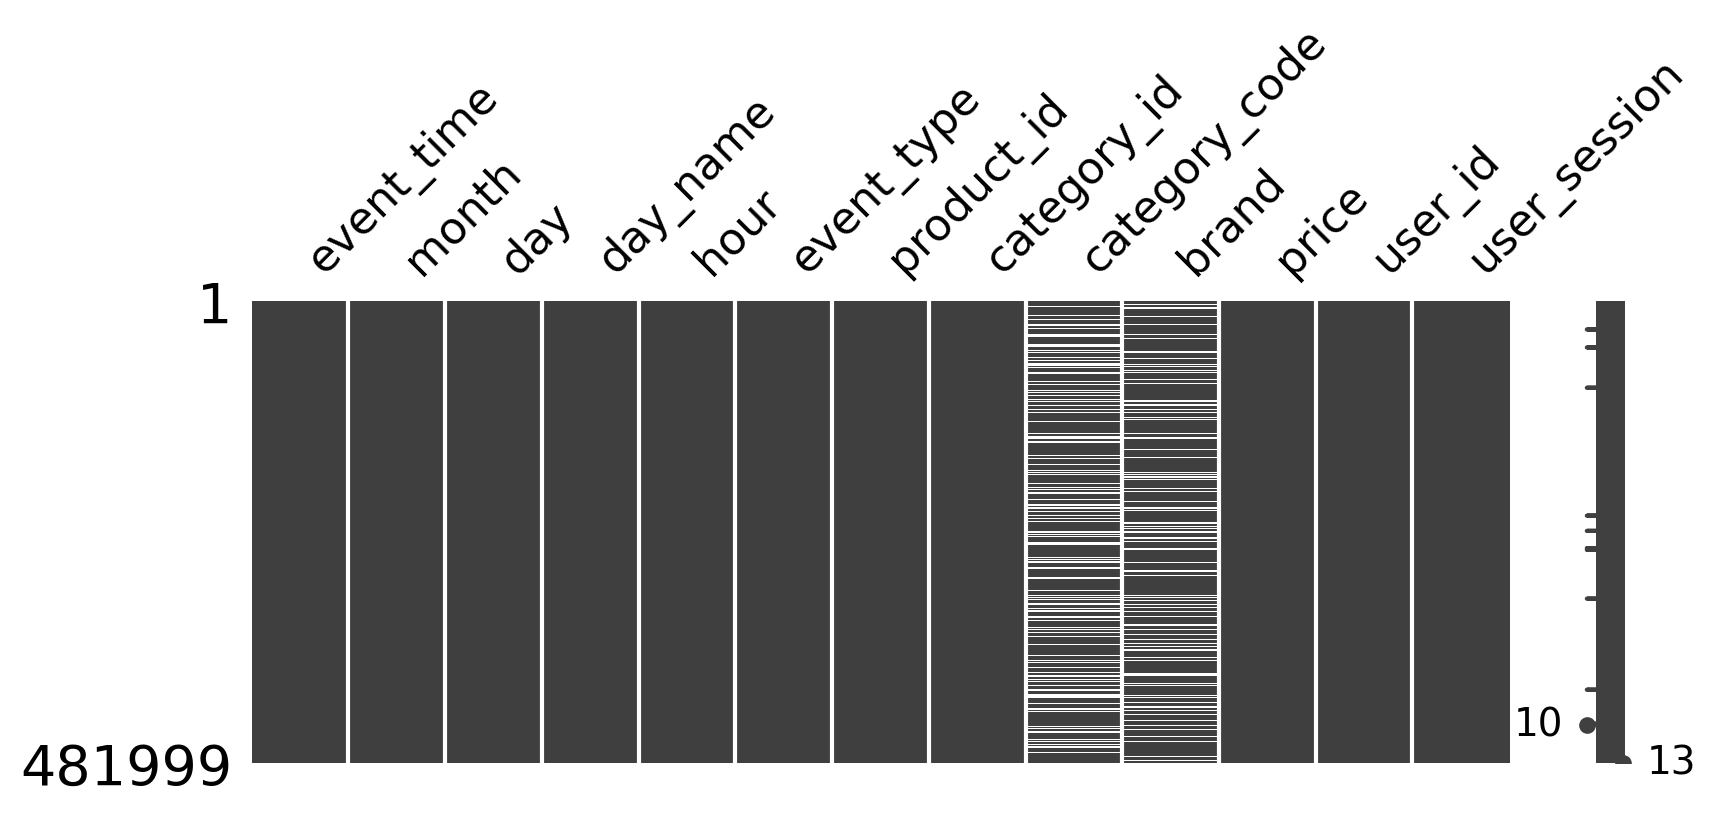

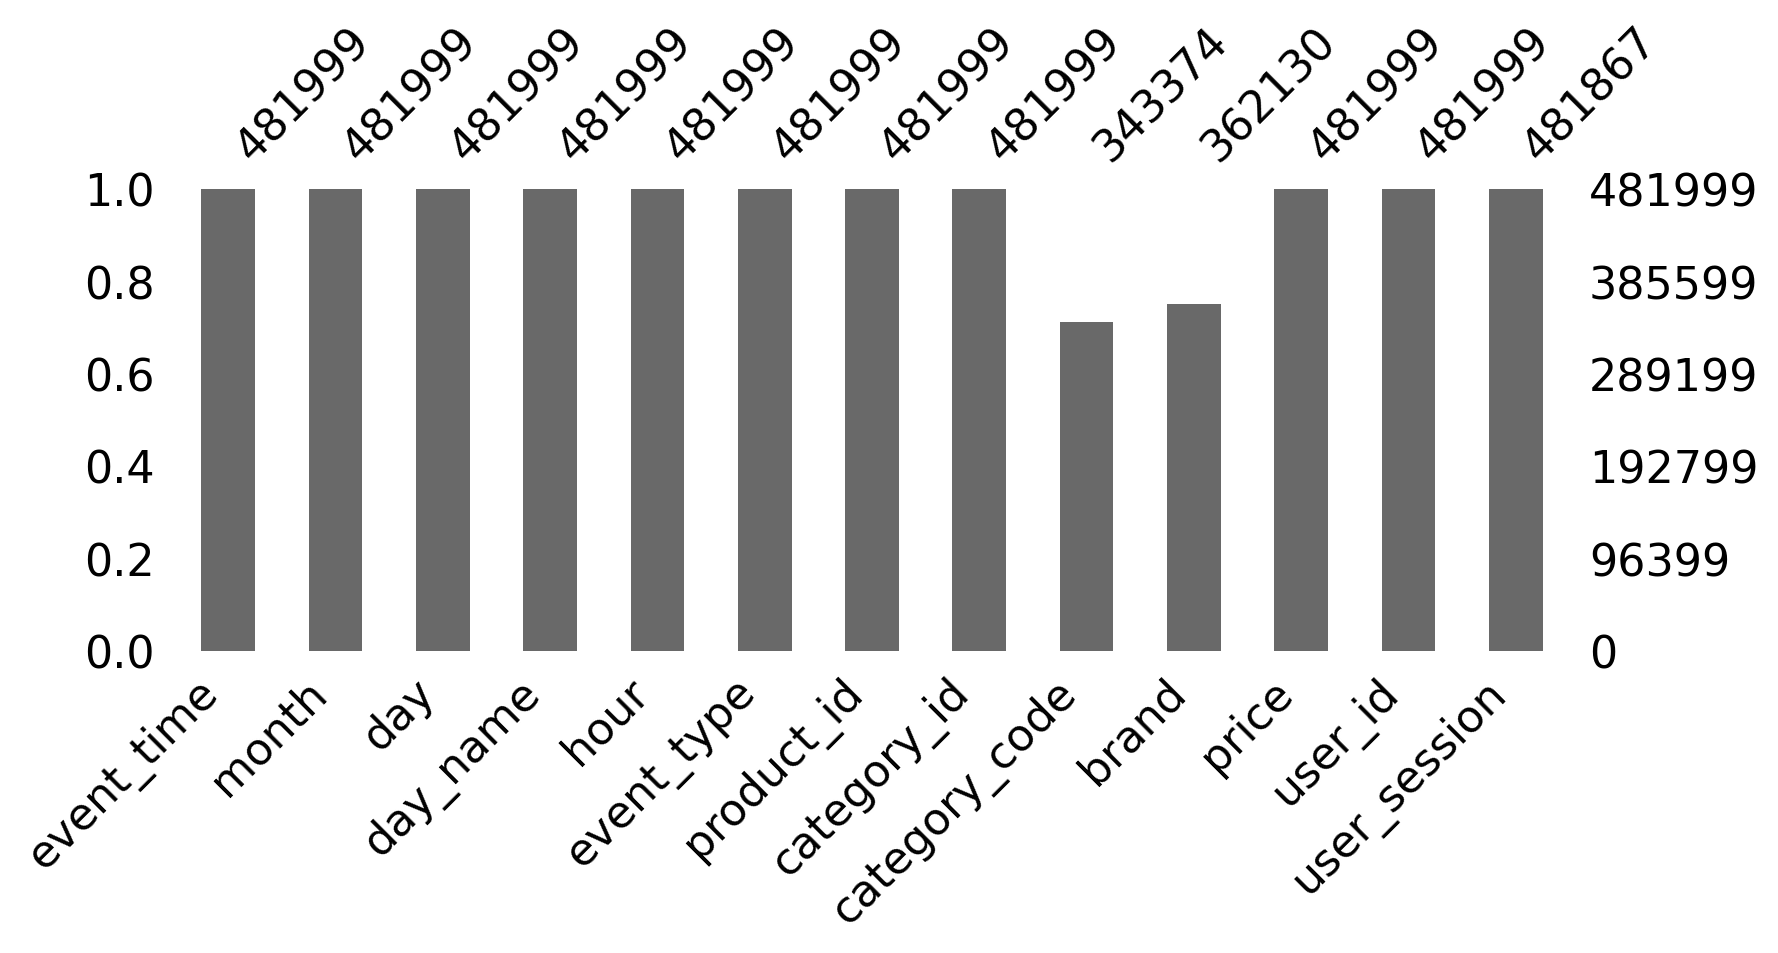

In [12]:
# 결측치 시각화
msno.matrix(df=df_copy, figsize=(9,3))
plt.show()

msno.bar(df_copy, figsize=(9,3))
plt.show()

In [13]:
# 결측치 비율 구함
null_total = df_copy.isnull().sum()
null_count = df_copy.isnull().count()
null_pct = round((null_total/null_count)*100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing = pd.concat([null_total, null_pct], axis=1, keys=["Total", "Percent"])
missing


Total  Percent
event_time          0      0.0
month               0      0.0
day                 0      0.0
day_name            0      0.0
hour                0      0.0
event_type          0      0.0
product_id          0      0.0
category_id         0      0.0
category_code  138625     28.8
brand          119869     24.9
price               0      0.0
user_id             0      0.0
user_session      132      0.0

#### barplot 사용하여 결측치 비율 시각화

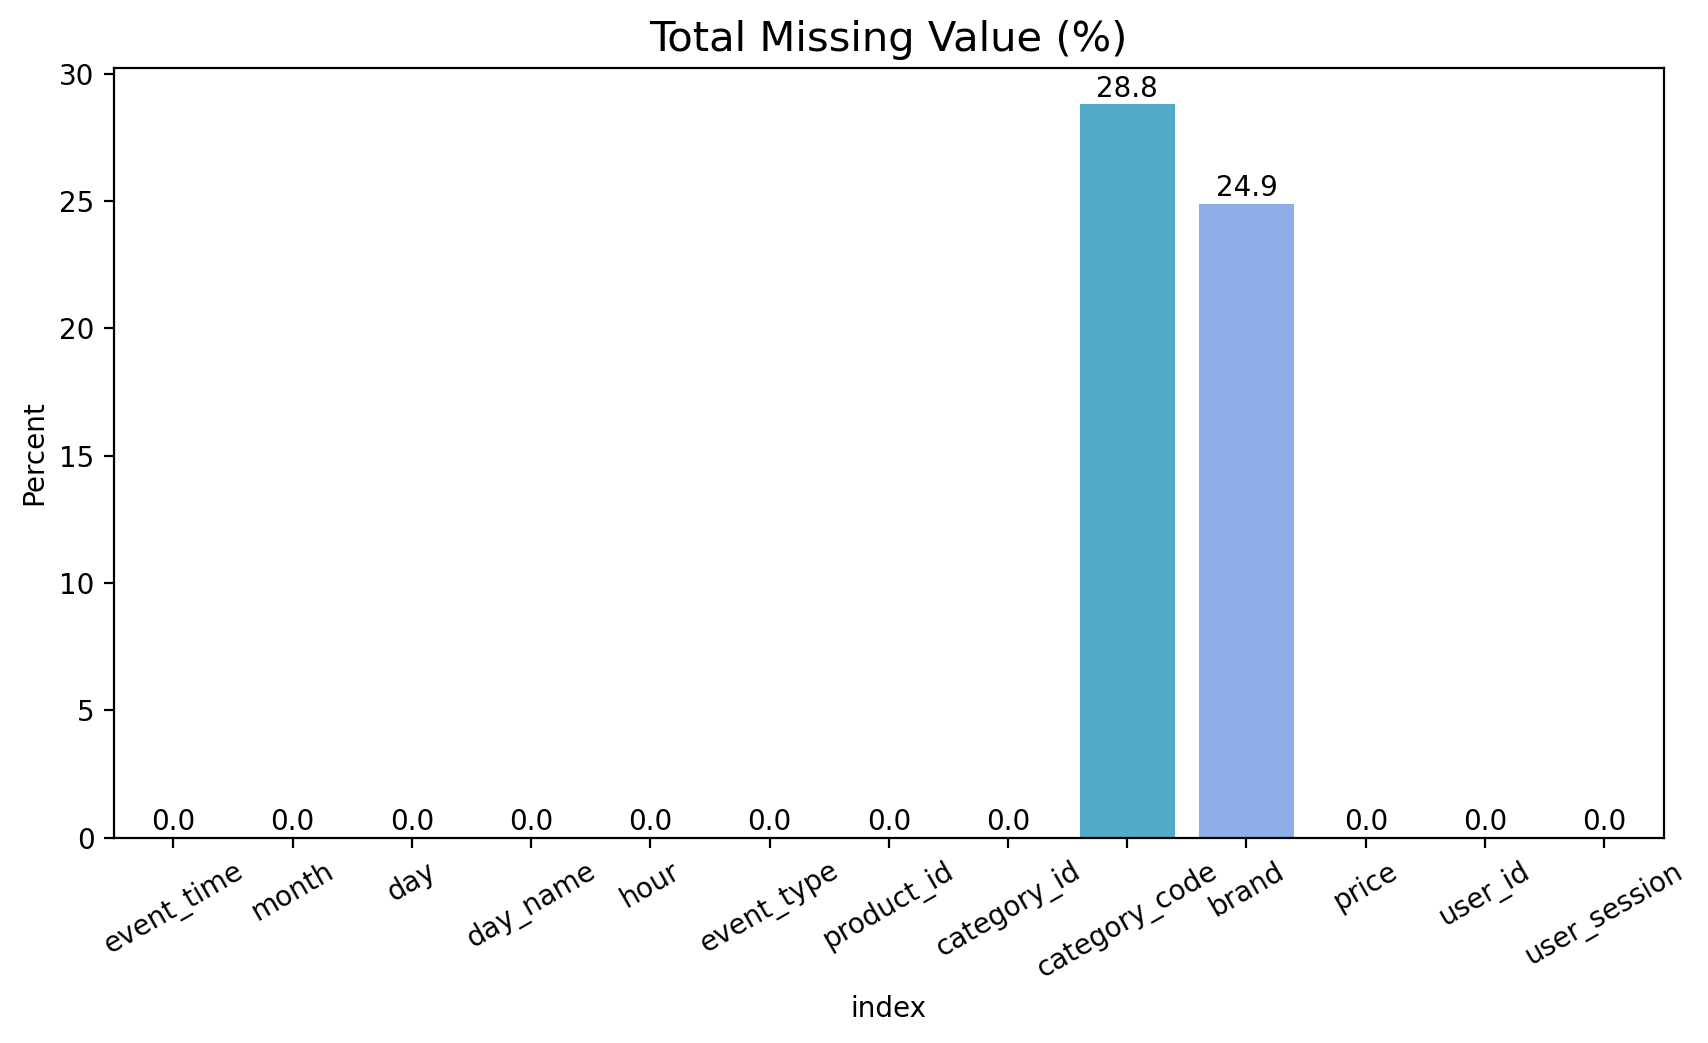

In [14]:
# 결측치 비율 시각화
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing.reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=30)

# bar 그래프 상단에 비율 (%) 표기
for bar in sns_pct.patches:
    height = bar.get_height()                   # .get_height() : y좌표

    plt.text(bar.get_x() + bar.get_width()/2,   # 퍼센트 글자 위치
             height+0.3,                        # 퍼센트 글자 높이
             "%.1f" % height,                   # 퍼센트 소수점 지정
             ha="center")                       # 가운데 정렬

# 시각화 제목 이름, 폰트 크기 지정
sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

### 결측치 제거

#### 만약 category_code, brand 동시에 결측치 처리된 값 제거한다면, 결측치 비율 어떨까?

In [110]:
# 전체 값 대비 category_code, brand, 전부 결측인 값들의 비율
null_cond = (df_copy["category_code"].isna()) & (df_copy["brand"].isna())
(df_copy[null_cond].shape[0] / df_copy.shape[0]) * 100

9.8910993591273

In [109]:
# 전체 데이터에서 category_code, brand 둘다 NaN 값인 경우 제거
both_null_cond = (df_copy["category_code"].notna()) | (df_copy["brand"].notna())
print(df_copy.shape)
print(df_copy[both_null_cond].shape)
print("둘 다 결측치인 개수 :", str(df_copy.shape[0]-df_copy[both_null_cond].shape[0]), "개")

(481999, 13)
(434324, 13)
둘 다 결측치인 개수 : 47675 개


In [111]:
df_copy2 = df_copy[both_null_cond]
df_copy2.shape

(434324, 13)

In [121]:
# 결측치 percent 구함
null_total_2 = df_copy2.isnull().sum()
null_count_2 = df_copy2.isnull().count()
percent_2 = round((null_total_2 / null_count_2) * 100, 1)

# # 결측치 개수, 퍼센트 데이터프레임으로 생성
missing_data_2 = pd.concat([null_total_2, percent_2], axis=1, keys=["Total", "Percent"])
missing_data_2

Total  Percent
event_time         0      0.0
month              0      0.0
day                0      0.0
day_name           0      0.0
hour               0      0.0
event_type         0      0.0
product_id         0      0.0
category_id        0      0.0
category_code  90950     20.9
brand          72194     16.6
price              0      0.0
user_id            0      0.0
user_session     121      0.0

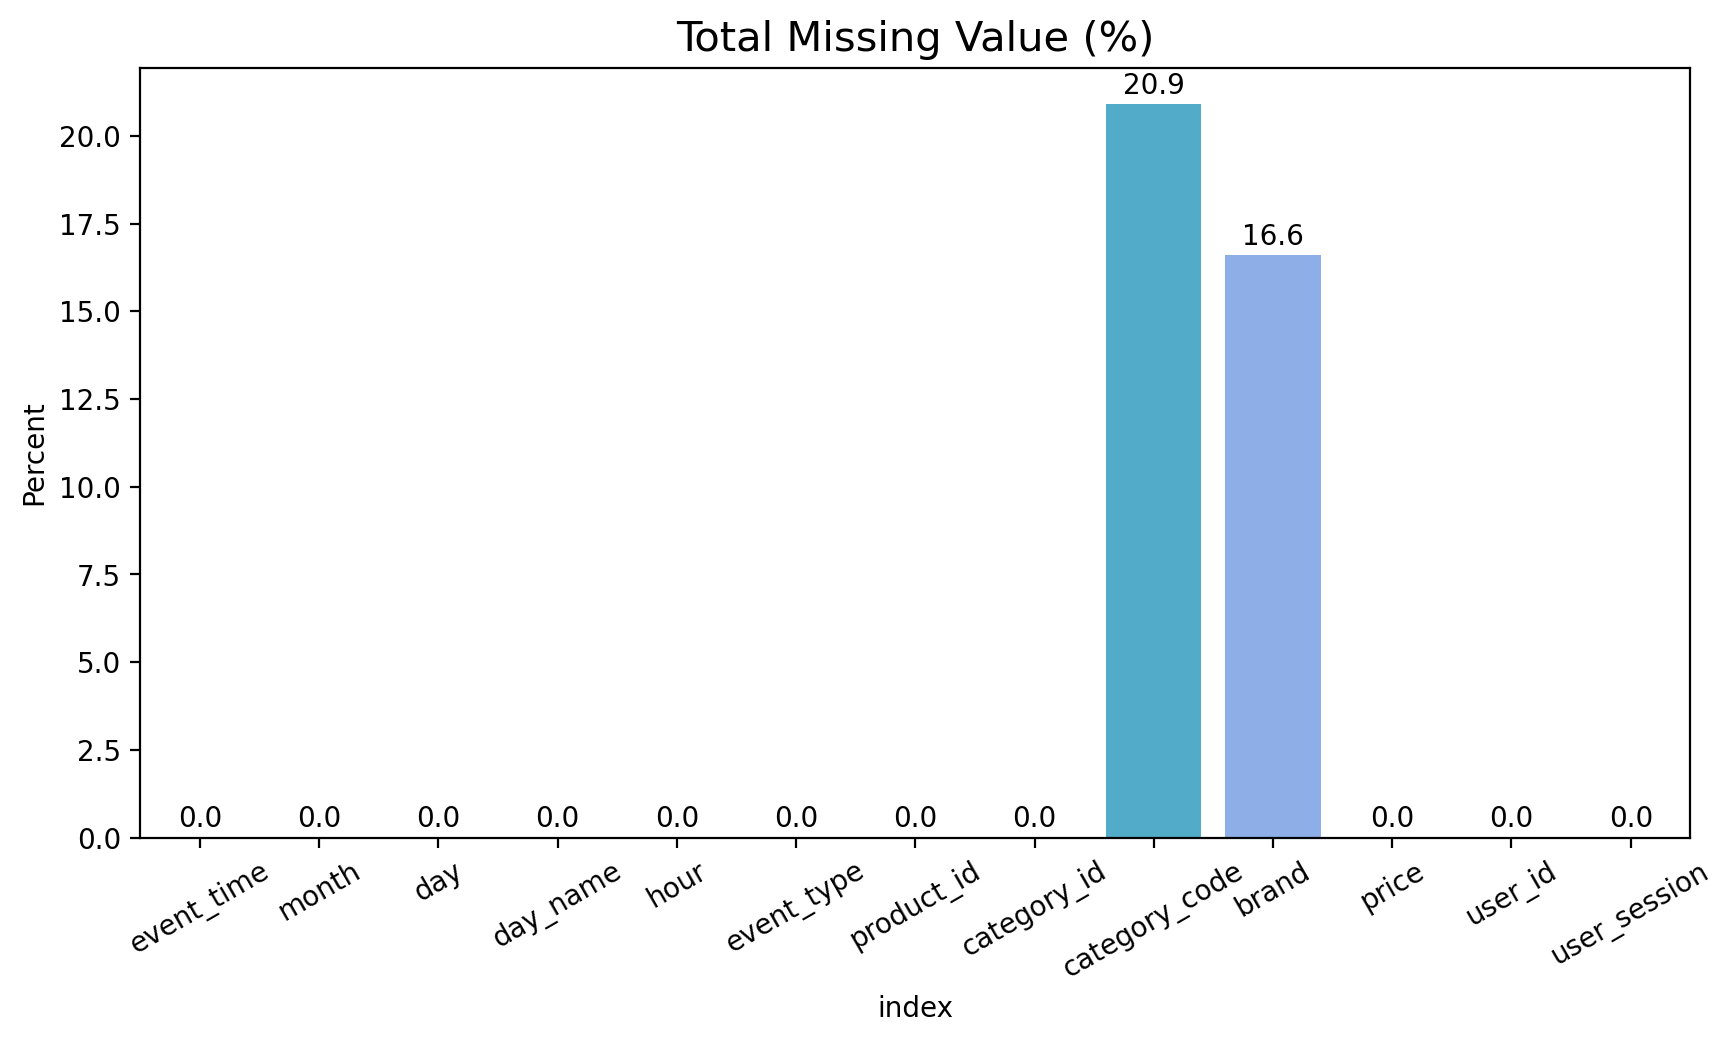

In [122]:
# 결측치 퍼센트 그래프 생성
plt.figure(figsize=(10, 5))
sns_pct_2 = sns.barplot(x="index", y="Percent", data=missing_data_2.reset_index())
sns_pct_2.set_xticklabels(sns_pct_2.get_xticklabels(), rotation=30)

# bar 그래프 상단에 퍼센트 표기
for bar in sns_pct_2.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.3, "%.1f" % height, ha="center")

sns_pct_2.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

In [15]:
# category_code에서의 결측치 확인
# category_id는 있는데, category_code가 결측치인 경우
df_copy[(df_copy["category_id"].notnull()) & df_copy["category_code"].isnull()]

event_time  month  day  day_name  hour event_type  \
2      2020-09-24 11:57:27+00:00      9   24  Thursday    11       view   
4      2020-09-24 11:57:36+00:00      9   24  Thursday    11       view   
8      2020-09-24 11:58:25+00:00      9   24  Thursday    11       view   
10     2020-09-24 11:58:34+00:00      9   24  Thursday    11       view   
11     2020-09-24 11:58:54+00:00      9   24  Thursday    11       view   
...                          ...    ...  ...       ...   ...        ...   
481971 2020-12-21 22:03:56+00:00     12   21    Monday    22       view   
481987 2020-12-21 22:05:43+00:00     12   21    Monday    22       view   
481989 2020-12-21 22:07:37+00:00     12   21    Monday    22       view   
481992 2020-12-21 22:09:53+00:00     12   21    Monday    22       view   
481996 2020-12-21 22:15:59+00:00     12   21    Monday    22       view   

        product_id   category_id category_code        brand  price  \
2           215454  2.140000e+18           NaN          NaN   9.81   
4          3658723  2.140000e+18           NaN  cameronsino  15.87   
8           657859  2.140000e+18           NaN          NaN  34.17   
10          811491  2.140000e+18           NaN       ritmix  33.32   
11          811491  2.140000e+18           NaN       ritmix  33.32   
...            ...           ...           ...          ...    ...   
481971        3147  2.140000e+18           NaN    transcend  14.62   
481987        3147  2.140000e+18           NaN    transcend  14.62   
481989      481930  2.140000e+18           NaN          NaN  10.05   
481992     4013211  2.140000e+18           NaN     kingston  60.02   
481996     4102122  2.140000e+18           NaN       baseus  13.65   

             user_id user_session  
2       1.520000e+18   4TMArHtXQy  
4       1.520000e+18   aa4mmk0kwQ  
8       1.520000e+18   HEl15U7JVy  
10      1.520000e+18   aFLc6y9kn4  
11      1.520000e+18   aFLc6y9kn4  
...              ...          ...  
481971  1.520000e+18   XdU7IRyzZA  
481987  1.520000e+18   XdU7IRyzZA  
481989  1.520000e+18   jlsyitdTeb  
481992  1.520000e+18   bxGVmW3fWe  
481996  1.520000e+18   KCb5plBKl6  

[138625 rows x 13 columns]

In [16]:
df_copy["category_id"].value_counts(normalize=True)

category_id
2.140000e+18    0.999548
2.150000e+18    0.000326
2.180000e+18    0.000060
2.230000e+18    0.000054
2.170000e+18    0.000008
2.220000e+18    0.000004
Name: proportion, dtype: float64

In [17]:
cat_code_null = df_copy[df_copy["category_code"].isnull()].index
cat_code_null

Index([     2,      4,      8,     10,     11,     12,     16,     18,     20,
           21,
       ...
       481960, 481962, 481964, 481965, 481968, 481971, 481987, 481989, 481992,
       481996],
      dtype='int64', length=138625)

In [18]:
df_copy.iloc[cat_code_null, :]

event_time  month  day  day_name  hour event_type  \
2      2020-09-24 11:57:27+00:00      9   24  Thursday    11       view   
4      2020-09-24 11:57:36+00:00      9   24  Thursday    11       view   
8      2020-09-24 11:58:25+00:00      9   24  Thursday    11       view   
10     2020-09-24 11:58:34+00:00      9   24  Thursday    11       view   
11     2020-09-24 11:58:54+00:00      9   24  Thursday    11       view   
...                          ...    ...  ...       ...   ...        ...   
481971 2020-12-21 22:03:56+00:00     12   21    Monday    22       view   
481987 2020-12-21 22:05:43+00:00     12   21    Monday    22       view   
481989 2020-12-21 22:07:37+00:00     12   21    Monday    22       view   
481992 2020-12-21 22:09:53+00:00     12   21    Monday    22       view   
481996 2020-12-21 22:15:59+00:00     12   21    Monday    22       view   

        product_id   category_id category_code        brand  price  \
2           215454  2.140000e+18           NaN          NaN   9.81   
4          3658723  2.140000e+18           NaN  cameronsino  15.87   
8           657859  2.140000e+18           NaN          NaN  34.17   
10          811491  2.140000e+18           NaN       ritmix  33.32   
11          811491  2.140000e+18           NaN       ritmix  33.32   
...            ...           ...           ...          ...    ...   
481971        3147  2.140000e+18           NaN    transcend  14.62   
481987        3147  2.140000e+18           NaN    transcend  14.62   
481989      481930  2.140000e+18           NaN          NaN  10.05   
481992     4013211  2.140000e+18           NaN     kingston  60.02   
481996     4102122  2.140000e+18           NaN       baseus  13.65   

             user_id user_session  
2       1.520000e+18   4TMArHtXQy  
4       1.520000e+18   aa4mmk0kwQ  
8       1.520000e+18   HEl15U7JVy  
10      1.520000e+18   aFLc6y9kn4  
11      1.520000e+18   aFLc6y9kn4  
...              ...          ...  
481971  1.520000e+18   XdU7IRyzZA  
481987  1.520000e+18   XdU7IRyzZA  
481989  1.520000e+18   jlsyitdTeb  
481992  1.520000e+18   bxGVmW3fWe  
481996  1.520000e+18   KCb5plBKl6  

[138625 rows x 13 columns]

In [19]:
df_copy[df_copy["category_code"].isnull()]

event_time  month  day  day_name  hour event_type  \
2      2020-09-24 11:57:27+00:00      9   24  Thursday    11       view   
4      2020-09-24 11:57:36+00:00      9   24  Thursday    11       view   
8      2020-09-24 11:58:25+00:00      9   24  Thursday    11       view   
10     2020-09-24 11:58:34+00:00      9   24  Thursday    11       view   
11     2020-09-24 11:58:54+00:00      9   24  Thursday    11       view   
...                          ...    ...  ...       ...   ...        ...   
481971 2020-12-21 22:03:56+00:00     12   21    Monday    22       view   
481987 2020-12-21 22:05:43+00:00     12   21    Monday    22       view   
481989 2020-12-21 22:07:37+00:00     12   21    Monday    22       view   
481992 2020-12-21 22:09:53+00:00     12   21    Monday    22       view   
481996 2020-12-21 22:15:59+00:00     12   21    Monday    22       view   

        product_id   category_id category_code        brand  price  \
2           215454  2.140000e+18           NaN          NaN   9.81   
4          3658723  2.140000e+18           NaN  cameronsino  15.87   
8           657859  2.140000e+18           NaN          NaN  34.17   
10          811491  2.140000e+18           NaN       ritmix  33.32   
11          811491  2.140000e+18           NaN       ritmix  33.32   
...            ...           ...           ...          ...    ...   
481971        3147  2.140000e+18           NaN    transcend  14.62   
481987        3147  2.140000e+18           NaN    transcend  14.62   
481989      481930  2.140000e+18           NaN          NaN  10.05   
481992     4013211  2.140000e+18           NaN     kingston  60.02   
481996     4102122  2.140000e+18           NaN       baseus  13.65   

             user_id user_session  
2       1.520000e+18   4TMArHtXQy  
4       1.520000e+18   aa4mmk0kwQ  
8       1.520000e+18   HEl15U7JVy  
10      1.520000e+18   aFLc6y9kn4  
11      1.520000e+18   aFLc6y9kn4  
...              ...          ...  
481971  1.520000e+18   XdU7IRyzZA  
481987  1.520000e+18   XdU7IRyzZA  
481989  1.520000e+18   jlsyitdTeb  
481992  1.520000e+18   bxGVmW3fWe  
481996  1.520000e+18   KCb5plBKl6  

[138625 rows x 13 columns]

In [20]:
df_copy[["product_id", "category_code"]]

product_id                     category_code
0          1996170             electronics.telephone
1           139905       computers.components.cooler
2           215454                               NaN
3           635807     computers.peripherals.printer
4          3658723                               NaN
...            ...                               ...
481994     4154736    computers.peripherals.keyboard
481995     4156223       electronics.audio.headphone
481996     4102122                               NaN
481997     1413341          computers.components.cpu
481998     1570050  computers.components.motherboard

[481999 rows x 2 columns]

In [21]:
df_copy[["product_id", "category_code"]].groupby(["product_id", "category_code"]).count()

Empty DataFrame
Columns: []
Index: [(854, electronics.telephone), (1103, auto.accessories.gps), (1245, electronics.audio.headphone), (1564, stationery.cartrige), (1572, stationery.cartrige), (1575, stationery.cartrige), (2033, electronics.audio.headphone), (2035, electronics.audio.headphone), (2365, computers.peripherals.wifi), (2514, electronics.telephone), (2515, electronics.telephone), (2674, electronics.telephone), (2717, computers.components.network_adapter), (3017, electronics.telephone), (3181, auto.accessories.gps), (3727, computers.components.hdd), (3729, electronics.telephone), (3974, electronics.audio.headphone), (4279, computers.peripherals.camera), (4316, computers.components.hdd), (4524, stationery.cartrige), (4525, stationery.cartrige), (4535, stationery.cartrige), (4917, computers.peripherals.wifi), (5004, computers.components.hdd), (5074, computers.peripherals.wifi), (5168, electronics.telephone), (5481, auto.accessories.videoregister), (5664, computers.components.hdd), (5665, computers.components.hdd), (5846, electronics.audio.headphone), (5913, computers.components.hdd), (6117, electronics.telephone), (6264, computers.peripherals.mouse), (6265, computers.peripherals.wifi), (6266, electronics.telephone), (6290, computers.components.hdd), (6313, computers.notebook), (6315, computers.notebook), (6439, electronics.telephone), (6440, electronics.telephone), (6464, computers.peripherals.mouse), (6467, computers.peripherals.keyboard), (6476, computers.peripherals.camera), (6506, computers.peripherals.mouse), (6598, electronics.telephone), (6610, electronics.audio.headphone), (6648, electronics.tablet), (6702, computers.components.hdd), (6787, electronics.telephone), (7028, computers.components.sound_card), (7173, computers.components.hdd), (7287, computers.peripherals.mouse), (7308, computers.desktop), (7312, accessories.bag), (7314, accessories.bag), (7361, computers.components.hdd), (7887, computers.peripherals.camera), (7979, electronics.tablet), (8074, stationery.cartrige), (8077, stationery.cartrige), (8078, stationery.cartrige), (8080, stationery.cartrige), (8081, stationery.cartrige), (8093, stationery.cartrige), (8096, stationery.cartrige), (8097, stationery.cartrige), (8099, stationery.cartrige), (8171, computers.peripherals.wifi), (9286, computers.peripherals.monitor), (9309, computers.peripherals.monitor), (9310, computers.peripherals.monitor), (9387, computers.peripherals.monitor), (9612, computers.peripherals.monitor), (9822, computers.peripherals.monitor), (10127, computers.peripherals.monitor), (10901, electronics.camera.video), (10910, electronics.camera.video), (10914, electronics.camera.video), (10916, electronics.camera.video), (10917, electronics.camera.video), (10921, electronics.camera.video), (10945, computers.peripherals.printer), (11003, computers.peripherals.printer), (11010, computers.peripherals.printer), (11012, computers.peripherals.printer), (11014, computers.peripherals.printer), (11015, computers.peripherals.printer), (11037, computers.peripherals.printer), (11056, computers.peripherals.printer), (11057, computers.peripherals.printer), (11061, computers.peripherals.printer), (11078, computers.peripherals.printer), (11181, computers.peripherals.printer), (11551, computers.peripherals.printer), (12099, computers.peripherals.printer), (12176, computers.peripherals.printer), (12177, computers.peripherals.printer), (12586, computers.peripherals.printer), (12669, computers.peripherals.printer), ...]

[28946 rows x 0 columns]

In [22]:
df_copy[["product_id", "category_code"]].groupby(["product_id", "category_code"]).first()

Empty DataFrame
Columns: []
Index: [(854, electronics.telephone), (1103, auto.accessories.gps), (1245, electronics.audio.headphone), (1564, stationery.cartrige), (1572, stationery.cartrige), (1575, stationery.cartrige), (2033, electronics.audio.headphone), (2035, electronics.audio.headphone), (2365, computers.peripherals.wifi), (2514, electronics.telephone), (2515, electronics.telephone), (2674, electronics.telephone), (2717, computers.components.network_adapter), (3017, electronics.telephone), (3181, auto.accessories.gps), (3727, computers.components.hdd), (3729, electronics.telephone), (3974, electronics.audio.headphone), (4279, computers.peripherals.camera), (4316, computers.components.hdd), (4524, stationery.cartrige), (4525, stationery.cartrige), (4535, stationery.cartrige), (4917, computers.peripherals.wifi), (5004, computers.components.hdd), (5074, computers.peripherals.wifi), (5168, electronics.telephone), (5481, auto.accessories.videoregister), (5664, computers.components.hdd), (5665, computers.components.hdd), (5846, electronics.audio.headphone), (5913, computers.components.hdd), (6117, electronics.telephone), (6264, computers.peripherals.mouse), (6265, computers.peripherals.wifi), (6266, electronics.telephone), (6290, computers.components.hdd), (6313, computers.notebook), (6315, computers.notebook), (6439, electronics.telephone), (6440, electronics.telephone), (6464, computers.peripherals.mouse), (6467, computers.peripherals.keyboard), (6476, computers.peripherals.camera), (6506, computers.peripherals.mouse), (6598, electronics.telephone), (6610, electronics.audio.headphone), (6648, electronics.tablet), (6702, computers.components.hdd), (6787, electronics.telephone), (7028, computers.components.sound_card), (7173, computers.components.hdd), (7287, computers.peripherals.mouse), (7308, computers.desktop), (7312, accessories.bag), (7314, accessories.bag), (7361, computers.components.hdd), (7887, computers.peripherals.camera), (7979, electronics.tablet), (8074, stationery.cartrige), (8077, stationery.cartrige), (8078, stationery.cartrige), (8080, stationery.cartrige), (8081, stationery.cartrige), (8093, stationery.cartrige), (8096, stationery.cartrige), (8097, stationery.cartrige), (8099, stationery.cartrige), (8171, computers.peripherals.wifi), (9286, computers.peripherals.monitor), (9309, computers.peripherals.monitor), (9310, computers.peripherals.monitor), (9387, computers.peripherals.monitor), (9612, computers.peripherals.monitor), (9822, computers.peripherals.monitor), (10127, computers.peripherals.monitor), (10901, electronics.camera.video), (10910, electronics.camera.video), (10914, electronics.camera.video), (10916, electronics.camera.video), (10917, electronics.camera.video), (10921, electronics.camera.video), (10945, computers.peripherals.printer), (11003, computers.peripherals.printer), (11010, computers.peripherals.printer), (11012, computers.peripherals.printer), (11014, computers.peripherals.printer), (11015, computers.peripherals.printer), (11037, computers.peripherals.printer), (11056, computers.peripherals.printer), (11057, computers.peripherals.printer), (11061, computers.peripherals.printer), (11078, computers.peripherals.printer), (11181, computers.peripherals.printer), (11551, computers.peripherals.printer), (12099, computers.peripherals.printer), (12176, computers.peripherals.printer), (12177, computers.peripherals.printer), (12586, computers.peripherals.printer), (12669, computers.peripherals.printer), ...]

[28946 rows x 0 columns]

In [23]:
cat_code_null = df_copy[df_copy["category_code"].isnull()]
cat_code_null.head()

event_time  month  day  day_name  hour event_type  \
2  2020-09-24 11:57:27+00:00      9   24  Thursday    11       view   
4  2020-09-24 11:57:36+00:00      9   24  Thursday    11       view   
8  2020-09-24 11:58:25+00:00      9   24  Thursday    11       view   
10 2020-09-24 11:58:34+00:00      9   24  Thursday    11       view   
11 2020-09-24 11:58:54+00:00      9   24  Thursday    11       view   

    product_id   category_id category_code        brand  price       user_id  \
2       215454  2.140000e+18           NaN          NaN   9.81  1.520000e+18   
4      3658723  2.140000e+18           NaN  cameronsino  15.87  1.520000e+18   
8       657859  2.140000e+18           NaN          NaN  34.17  1.520000e+18   
10      811491  2.140000e+18           NaN       ritmix  33.32  1.520000e+18   
11      811491  2.140000e+18           NaN       ritmix  33.32  1.520000e+18   

   user_session  
2    4TMArHtXQy  
4    aa4mmk0kwQ  
8    HEl15U7JVy  
10   aFLc6y9kn4  
11   aFLc6y9kn4

In [24]:
df_copy[(df_copy["product_id"]==811491) & (df_copy["brand"]=="ritmix")]["category_code"].notnull().sum()

0

In [25]:
df_copy[(df_copy["product_id"]==3658723) & (df_copy["brand"]=="cameronsino")]["category_code"].notnull().sum()


0

In [33]:
# 범주형 칼럼 리스트 cat_columns에 선언
cat_cols = df_copy.select_dtypes(exclude="number").columns.tolist()
cat_cols

['event_time',
 'day_name',
 'event_type',
 'category_code',
 'brand',
 'user_session']

In [37]:
df_encoded = df_copy.copy()

In [34]:
# label encoder 사용해서 event_type 변수 인코딩
# event_type 변수가 target 변수라고 생각함

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = df_copy[["event_type"]].apply(le.fit_transform)

label_encoded

event_type
0                2
1                2
2                2
3                2
4                2
...            ...
481994           2
481995           2
481996           2
481997           2
481998           2

[481999 rows x 1 columns]

In [36]:
# label encoder로 변경된 target 변수 확인
dict(zip(le.classes_, le.transform(le.classes_)))

{'cart': 0, 'purchase': 1, 'view': 2}

In [38]:
# label encoding한 event_type 컬럼 원래 데이터프레임에 붙임
df_encoded.drop(["event_type"], axis="columns", inplace=True)
df_encoded = df_encoded.join(label_encoded)
df_encoded.head()

event_time  month  day  day_name  hour  product_id  \
0 2020-09-24 11:57:06+00:00      9   24  Thursday    11     1996170   
1 2020-09-24 11:57:26+00:00      9   24  Thursday    11      139905   
2 2020-09-24 11:57:27+00:00      9   24  Thursday    11      215454   
3 2020-09-24 11:57:33+00:00      9   24  Thursday    11      635807   
4 2020-09-24 11:57:36+00:00      9   24  Thursday    11     3658723   

    category_id                  category_code        brand   price  \
0  2.140000e+18          electronics.telephone          NaN   31.90   
1  2.140000e+18    computers.components.cooler       zalman   17.16   
2  2.140000e+18                            NaN          NaN    9.81   
3  2.140000e+18  computers.peripherals.printer       pantum  113.81   
4  2.140000e+18                            NaN  cameronsino   15.87   

        user_id user_session  event_type  
0  1.520000e+18   LJuJVLEjPT           2  
1  1.520000e+18   tdicluNnRY           2  
2  1.520000e+18   4TMArHtXQy           2  
3  1.520000e+18   aGFYrNgC08           2  
4  1.520000e+18   aa4mmk0kwQ           2

In [64]:
# category_encoder 사용하여 frequent encoding
import category_encoders as ce

cols_to_impute = ["category_code", "brand"]

count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df_encoded[cols_to_impute])

In [65]:
count_encoded.head()

category_code   brand
0          49441  119869
1           5364    2071
2         138625  119869
3          27173    2272
4         138625    3499

In [66]:
count_encoded.columns = ["cat_code_encoded", "br_encoded"]

# 카테고리 인코딩된 값을 결측치로 매핑

# cat_code_map = {138625 : np.nan}
# br_map = {119869 : np.nan}

count_encoded["cat_code_encoded"] = count_encoded["cat_code_encoded"].map(lambda x : np.nan if x == 138625 else x)
count_encoded["br_encoded"] = count_encoded["br_encoded"].map(lambda x : np.nan if x == 119869 else x)

count_encoded.head()

cat_code_encoded  br_encoded
0           49441.0         NaN
1            5364.0      2071.0
2               NaN         NaN
3           27173.0      2272.0
4               NaN      3499.0

In [80]:
# count_encoded[count_encoded["cat_code_encoded"]==12045]
count_encoded[count_encoded["br_encoded"]==2071]

cat_code_encoded  br_encoded
1                 5364.0      2071.0
102               5364.0      2071.0
300                  NaN      2071.0
306                  NaN      2071.0
308                  NaN      2071.0
...                  ...         ...
481491               NaN      2071.0
481543               NaN      2071.0
481631               NaN      2071.0
481651            5364.0      2071.0
481874            5364.0      2071.0

[4142 rows x 2 columns]

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ii = IterativeImputer()
count_encoded = ii.fit_transform(count_encoded)

In [63]:
count_encoded

array([[49441.        ,  7225.07076662],
       [ 5364.        ,  2071.        ],
       [17300.50827813,  4029.97041206],
       ...,
       [12045.90516927,   582.        ],
       [14399.        , 11900.        ],
       [14201.        ,  5196.        ]])

In [43]:
cols_to_impute = ["category_code", "brand"]

imputer = IterativeImputer()

df_imputed[cols_to_impute] = imputer.fit_transform(df_imputed[cols_to_impute])


ValueError: could not convert string to float: 'electronics.telephone'

## event_type 분석

### event_type 분포

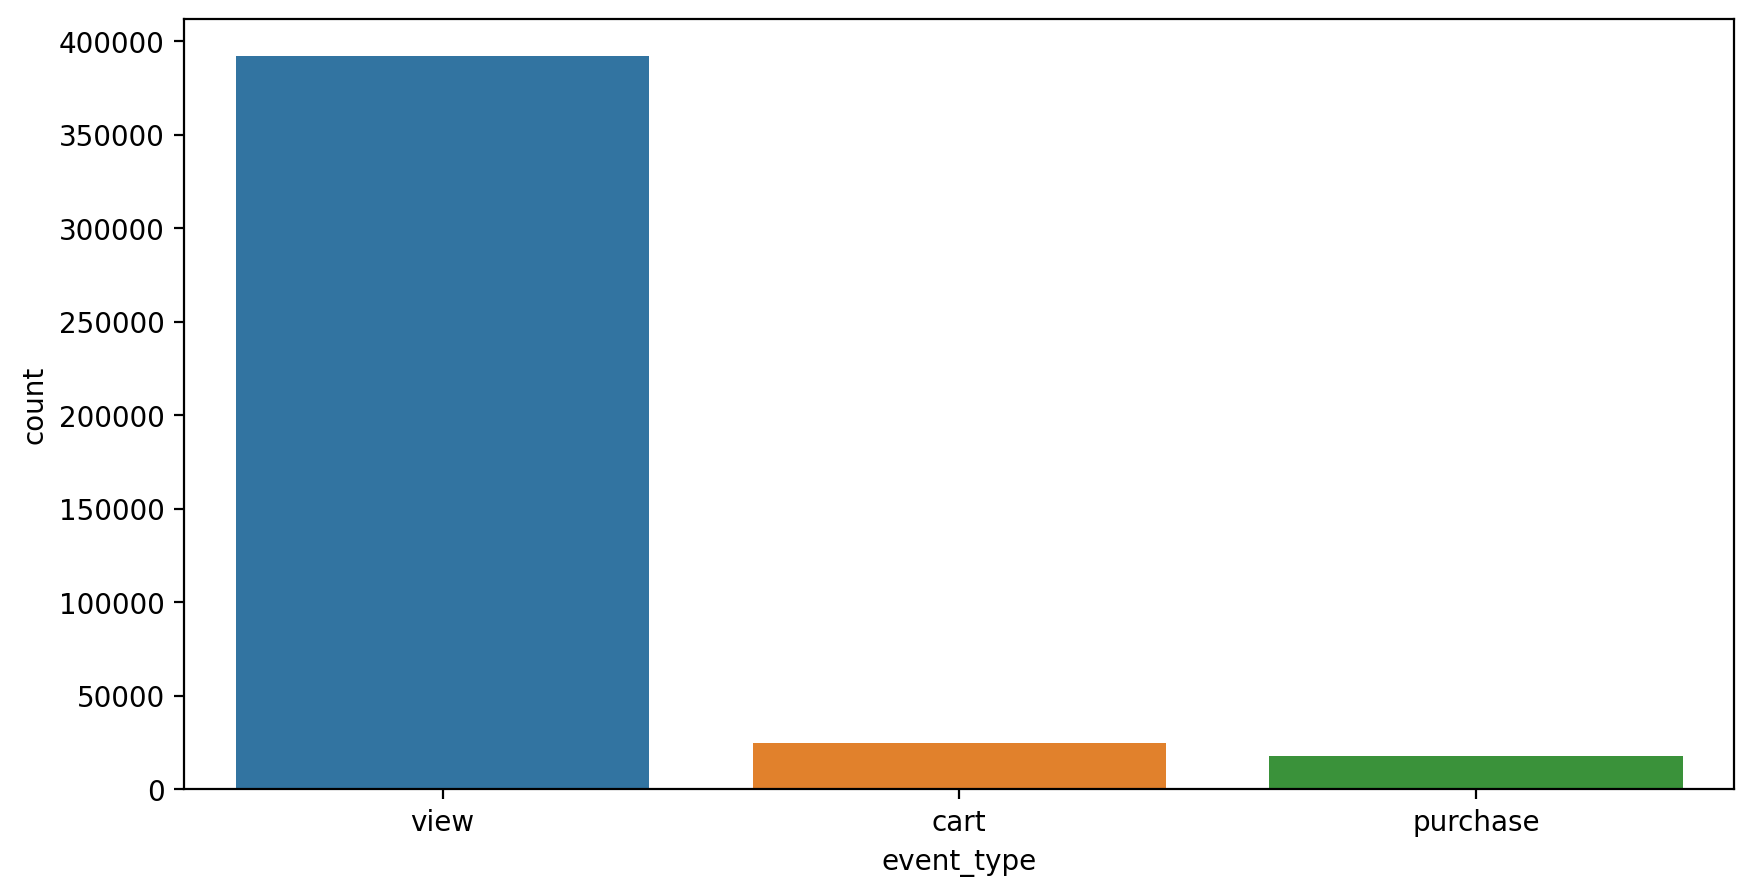

In [125]:
# event_type 분포
plt.figure(figsize=(10, 5))
cnt = sns.countplot(x=df_copy2["event_type"])
plt.show()

In [126]:
df_copy2["event_type"].value_counts(normalize=True)

event_type
view        0.902370
cart        0.056951
purchase    0.040679
Name: proportion, dtype: float64

### 요일별 고객 행동 분석

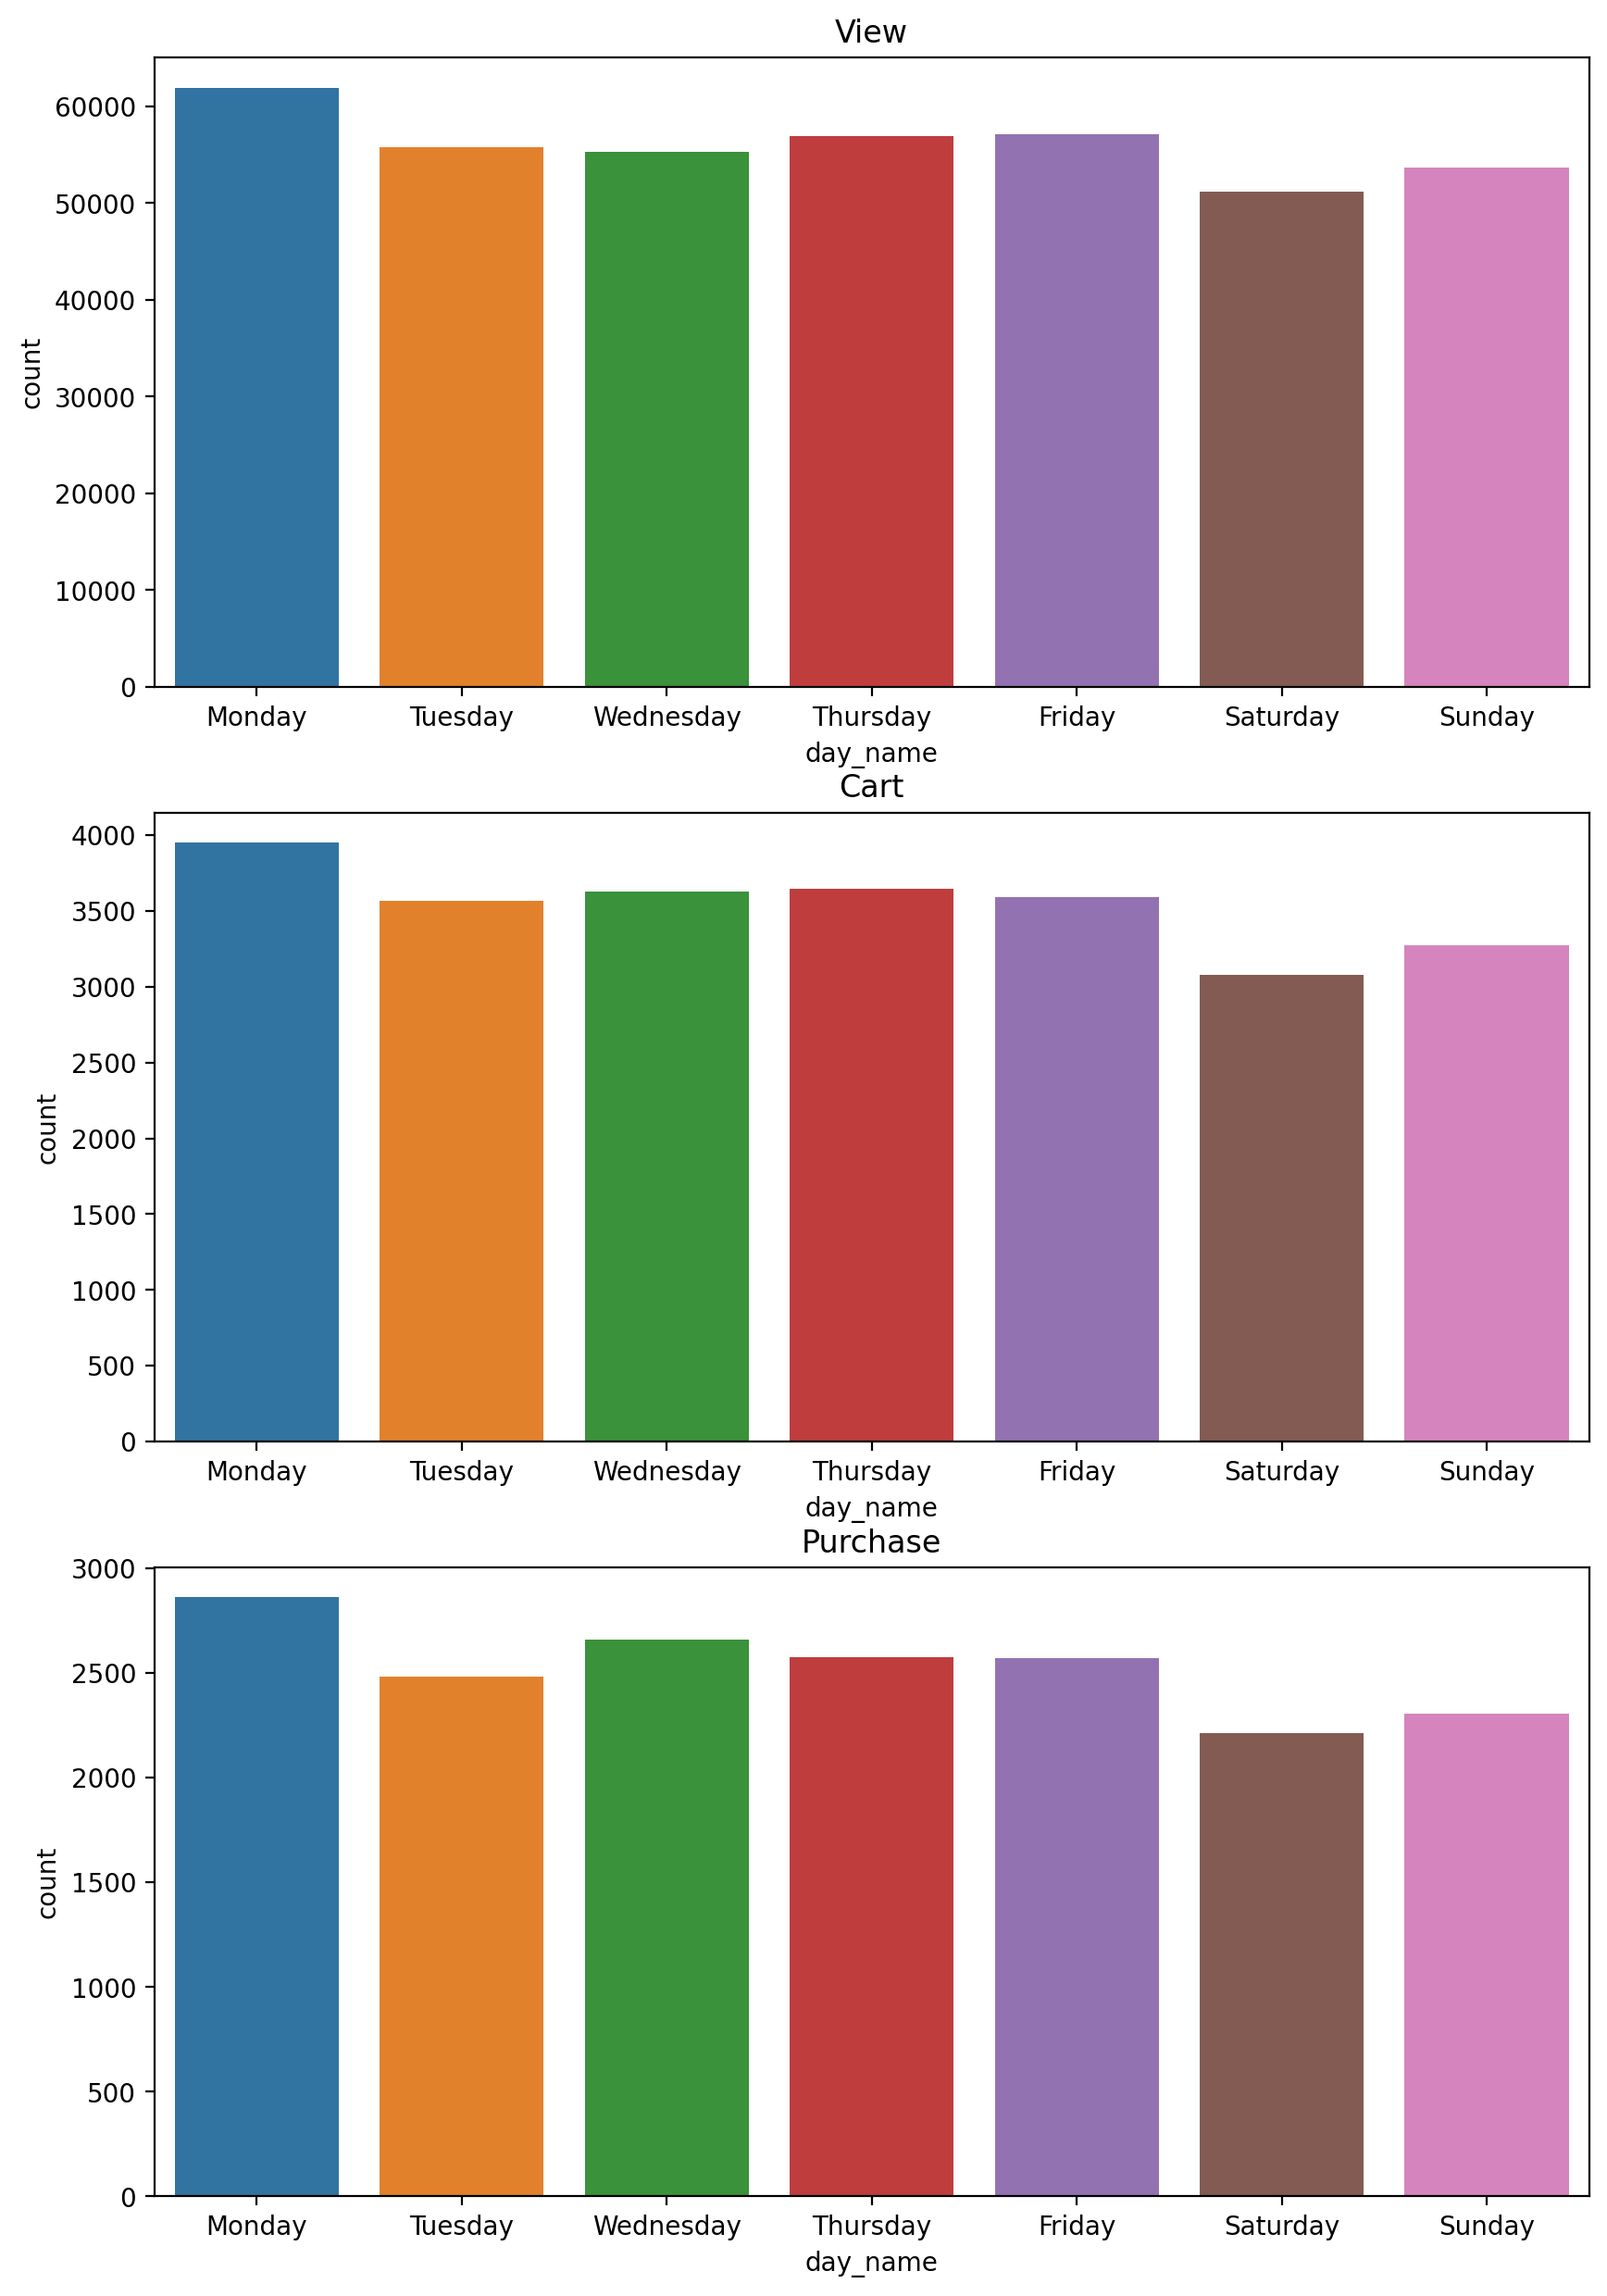

In [127]:
# 상품 클릭, 장바구니, 구매 조건 설정
view_cond = (df_copy2["event_type"] == "view")
cart_cond = (df_copy2["event_type"] == "cart")
purchase_cond = (df_copy2["event_type"] == "purchase")

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_cnt = sns.countplot(x=df_copy2[view_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],              
                         ax=ax[0])
view_cnt.set_title("View")

# 요일별 장바구니에 넣은 숫자
cart_cnt = sns.countplot(x=df_copy2[cart_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         ax=ax[1])
cart_cnt.set_title("Cart")

# 요일별 구매한 숫자
purchase_cnt = sns.countplot(x=df_copy2[purchase_cond]["day_name"],
                             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                             ax=ax[2])
purchase_cnt.set_title("Purchase")

plt.show()

### 시간대별 고객 행동 시각화

In [128]:
# 시간대별 View, Cart, Purchase

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_time_cnt = sns.countplot(x=df_copy2[view_cond]["hour"],
                              ax=ax[0])
view_time_cnt.set_title("View Time")

# 요일별 장바구니에 넣은 숫자
cart_time_cnt = sns.countplot(x=df_copy2[cart_cond]["hour"],
                         ax=ax[1])
cart_time_cnt.set_title("Cart Time")

# 요일별 구매한 숫자
purchase_time_cnt = sns.countplot(x=df_copy2[purchase_cond]["hour"],
                             ax=ax[2])
purchase_time_cnt.set_title("Purchase Time")

plt.show()

### 구매전환율 (CVR, Conversion Rate) 구하기
- 사이트에 들어온 방문자가 실제 구매 활동을 하는 비율
- 구매전환율 = 전환수(구매횟수)/클릭수*100

In [129]:
df_heat = df_copy2.copy()
# df_heat['event_time'] =  df_heat['event_time'].dt.to_period('D')

df_view_cvr = df_heat.loc[df_heat['event_type']=='view']
df_view_cvr = df_view_cvr[['event_time','user_session','price']]

df_pur_cvr = df_heat.loc[df_heat['event_type']=='purchase']
df_pur_cvr = df_pur_cvr[['event_time','user_session','price']]

In [130]:
# view
df_date_view = df_view_cvr.groupby('event_time').count().reset_index()
# purchase
df_date_purchase = df_pur_cvr.groupby('event_time').count().reset_index()

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')


# cvr 컬럼추가
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100

In [131]:
# 일별 매출
df_day_purchase = df_heat.loc[df_heat['event_type']=='purchase']
df_day_purchase['event_time'] =  df_day_purchase['event_time']

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# merge

df_cvr = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr['weekday'] = df_cvr['event_time'].dt.weekday
df_cvr

C:\Users\aryij\AppData\Local\Temp\ipykernel_2540\4292615488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_purchase['event_time'] =  df_day_purchase['event_time']


event_time  user_session_x  price_x  user_session_y  \
0    2020-09-24 12:49:24+00:00               1        1               1   
1    2020-09-24 12:49:46+00:00               1        1               1   
2    2020-09-24 15:48:48+00:00               1        1               1   
3    2020-09-24 16:15:43+00:00               1        1               1   
4    2020-09-25 06:54:46+00:00               1        1               1   
...                        ...             ...      ...             ...   
1061 2020-12-21 14:22:06+00:00               1        1               2   
1062 2020-12-21 16:46:06+00:00               1        1               1   
1063 2020-12-21 18:01:56+00:00               1        1               1   
1064 2020-12-21 18:55:49+00:00               1        1               1   
1065 2020-12-21 19:08:45+00:00               1        1               1   

      price_y    CVR   price  weekday  
0           1  100.0   36.03        3  
1           1  100.0  123.35        3  
2           1  100.0   23.48        3  
3           1  100.0   59.54        3  
4           1  100.0  251.92        4  
...       ...    ...     ...      ...  
1061        2  200.0  139.77        0  
1062        1  100.0  482.52        0  
1063        1  100.0   10.48        0  
1064        1  100.0  370.46        0  
1065        1  100.0   44.13        0  

[1066 rows x 8 columns]

#### 일일 매출, CVR 시각화

Text(0.5, 1.0, 'Daily CVR')

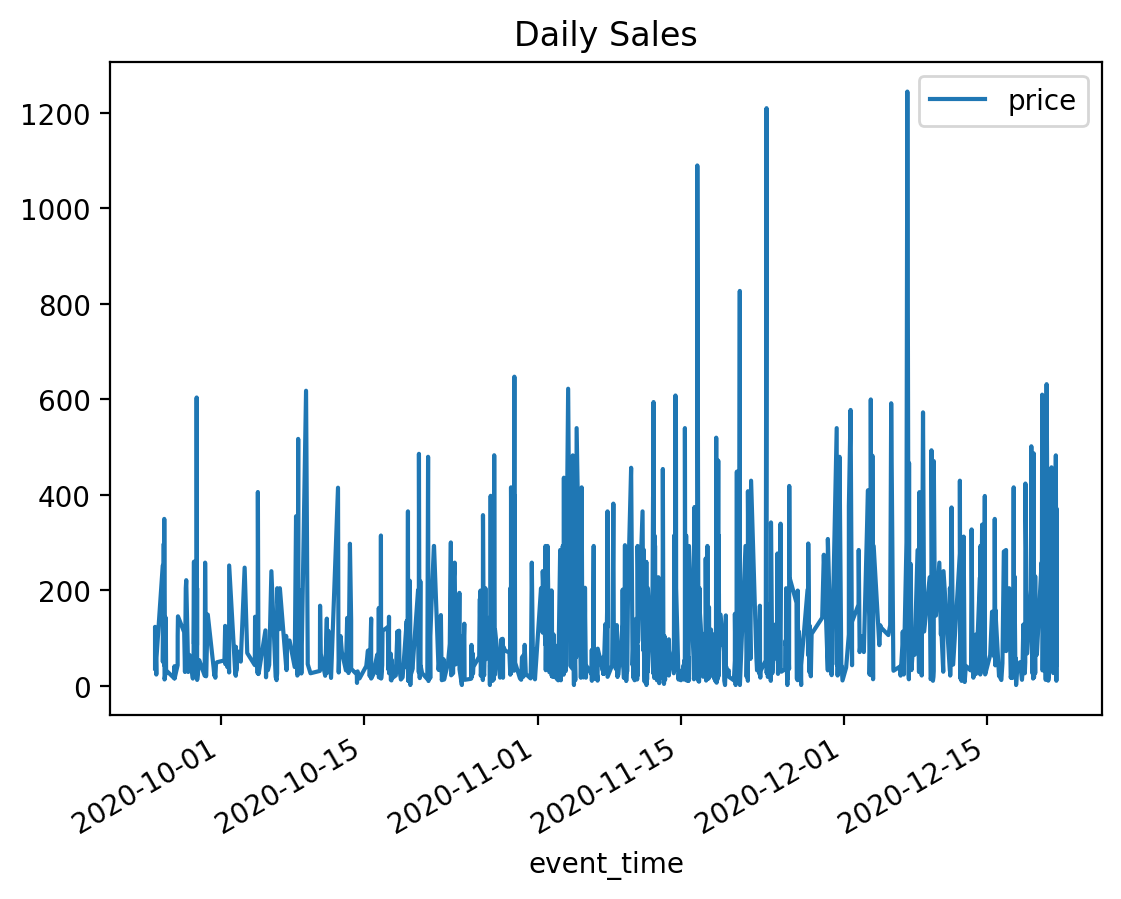

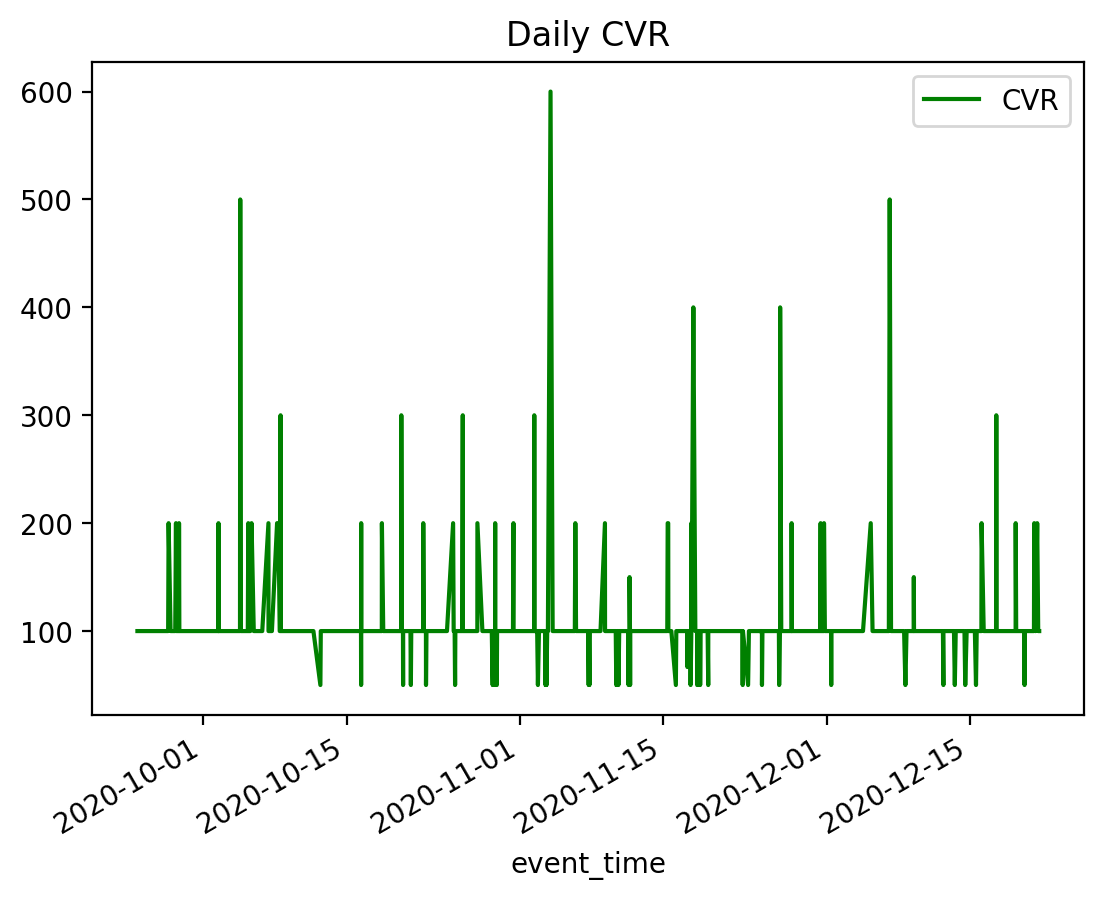

In [132]:
# 일일 매출, CVR 시각화

sales_line = df_cvr.plot(x="event_time", y="price")
sales_line.set_title("Daily Sales")

cvr_line = df_cvr.plot(x="event_time", y="CVR", color="green")
cvr_line.set_title("Daily CVR")

## 생각해볼 것
- 고객 행동 분석
    - 전체적으로 월요일에 view, cart, purchase 횟수가 많다
        - 월요일에 특정 Action Plan 가져갈 수 있을까?
    - 시간대별 그래프도 view, cart, purchase 거의 비슷한 양상이지만, 17시 ~ 19시 사이 그래프 모양이 좀 다르다
        - purchase 오전 10시에 높지만, view, cart에 비해 17시 ~ 19시는 낮다

## 추가 진행 요소
- 결측치 처리 방법
- CVR 다시 구해보기
- 퍼널, 코호트 분석
